# Purposes

This file aims to generate 2D and 3D examples to the Optimization book. Some ugly code may present. 

For the latest version, please refer to [here](https://github.com/course-note-cug/CS-DAT/tree/main/Optimization). 

# 0. Prerequisites

In order to be clear, we import some packages. 

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import interactive
import numpy as np
import random

We will begin by some plot functions. 

In [3]:
def plotpoints3d(xs, ys, zs, animate=False):
    # Create a 3D subplot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create NumPy arrays for your data points
    x = xs
    y = ys
    z = zs

    # Plot the points
    ax.scatter(x, y, z, c='b', marker='o')  # 'c' specifies the color, 'marker' specifies the marker style

    # Set labels for the axes
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    # Show the plot
    if animate: 
        for angle in range(0, 360):
            ax.view_init(angle,30)
            plt.draw()
            plt.pause(.001)
    else: plt.show()

def plotpoints2d(xs, ys):
    x = xs
    y = ys

    # Plot the points
    plt.scatter(x, y, c='b', marker='o')  # 'c' specifies the color, 'marker' specifies the marker style

    # Set labels for the axes
    plt.xlabel('X Label')
    plt.ylabel('Y Label')

    # Show the plot
    plt.show()

# 2. Some examples

## Lines: 

Recall the definition: Suppose $x_1 \neq x_2$ are two points $\in \mathbb{R}^n$, Points of the form $y=\theta x_1+(1-\theta) x_2$ is called a line. If we restrict $\theta \in[0,1]$, call it a line segment.

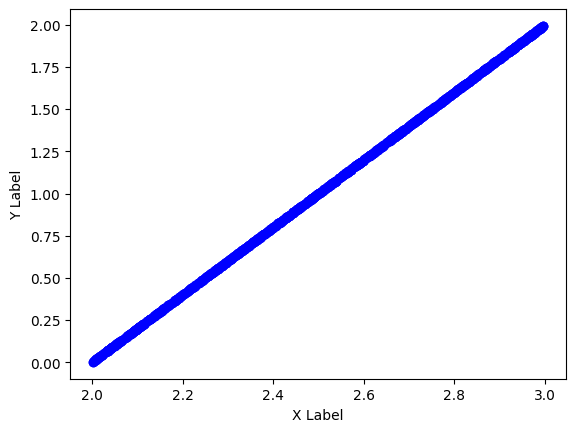

In [4]:
x1=np.array([2, 0])
x2=np.array([3, 2])
theta = np.random.rand(1000)  # 1000 random x-coordinates between 0 and 1

dot_lst = np.array([x1*th + (1-th)*x2 for th in theta])

plotpoints2d(dot_lst[:,0], dot_lst[:,1])

Ther is also one in 3D space: 

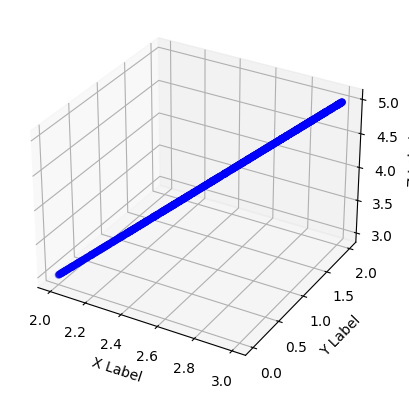

In [5]:
x1=np.array([2, 0, 3])
x2=np.array([3, 2, 5])
theta = np.random.rand(1000)  # 1000 random x-coordinates between 0 and 1

dot_lst = np.array([x1*th + (1-th)*x2 for th in theta])

plotpoints3d(dot_lst[:,0], dot_lst[:,1], dot_lst[:, 2])

## Affine sets

We remember this is affine combination:  Call a point of the form $\theta_1 x_1+\cdots+\theta_k x_k$ as an affine combination where $\theta_1+\cdots+\theta_k=1$.

And the defn of Affine set: If $C$ is an affine set, $x_1, x_2, \cdots, x_k \in C$, and $\theta_1+\cdots+\theta_k=1$, then $\theta_1 x_1+\cdots+\theta_k x_k \in C$.

Question: What is the affine space given by countable points? We will generate them. 

In [6]:
def gen_affine_comb(n):
    flg = True
    while flg: 
        fractions = [random.uniform(-1, 1) for _ in range(n)] # I cant make it to negative infinity
        su = sum(fractions)
        fractions = list(map(lambda x: x/su, fractions))
        chk = False
        for i in fractions:
            print(i)
            if i > 1.0:
                print("REG")
                flg = True
                chk = True
        if(not chk):
            flg = False
    return np.array(list(fractions))

In [7]:
gen_affine_comb(3)

1.908773667709024
REG
-1.42356363318005
0.5147899654710262
0.28219503873406226
0.3647426347510075
0.3530623265149303


array([0.28219504, 0.36474263, 0.35306233])

Then there is a function to generate coefficients of convex combination.

In [8]:
def gen_convex_comb(n):
    fractions = [random.uniform(0, 1) for _ in range(n)]
    su = sum(fractions)
    fractions = map(lambda x: x/su, fractions)
    return np.array(list(fractions))

In [9]:
gen_convex_comb(3)

array([0.25862714, 0.33636474, 0.40500812])

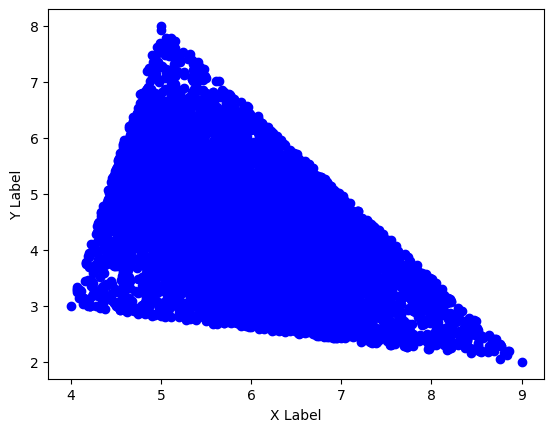

In [10]:
n_samples = 10000
vec_0 = np.array([[9, 2]])
vec_1 = np.array([[4, 3]])
vec_2 = np.array([[5, 8]])


result = np.array([1, 1, 1])[:,np.newaxis] * np.vstack([vec_0, vec_1, vec_2])

# Generate 10000 combinations
for i in range(10000):
    newres = gen_convex_comb(3)[:,np.newaxis] * np.vstack([vec_0, vec_1, vec_2])
    result = np.vstack([(newres[0]+newres[1]+newres[2]), result])
    
# result
plotpoints2d(result[:,0], result[:,1])

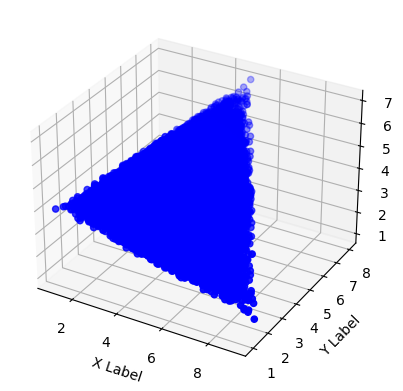

In [11]:
n_samples = 100000
vec_0 = np.array([[9, 2, 1 ]])
vec_1 = np.array([[4, 3, 5]])
vec_2 = np.array([[5, 8, 7]])
vec_3 = np.array([[1, 1, 4]])


result = np.array([1, 1, 1, 1])[:,np.newaxis] * np.vstack([vec_0, vec_1, vec_2, vec_3])

for i in range(n_samples):
    newres = gen_convex_comb(4)[:,np.newaxis] * np.vstack([vec_0, vec_1, vec_2, vec_3])
    result = np.vstack([(newres[0]+newres[1]+newres[2]+newres[3]), result])
    
# result

plt.ion()
plotpoints3d(result[:,0], result[:,1], result[:,2])


